In [1]:
import numpy as np
import matplotlib.pyplot as plt

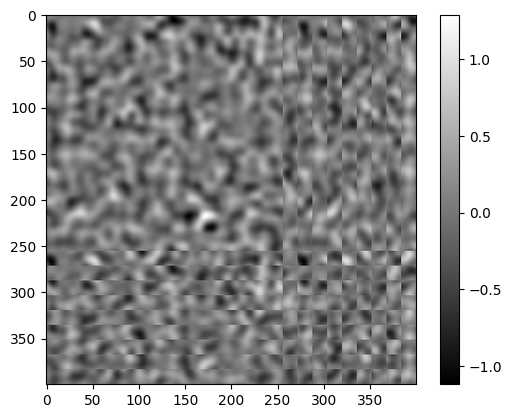

In [7]:
def fade(t):
    return t**3 * (t * (t * 6 - 15) + 10)

def lerp(t, a, b):
    return a + t * (b - a)

def perlin_noise_2d(width, height, grid_size):
    gradients = np.random.randn(grid_size + 1, grid_size + 1, 2)
    noise_grid = np.zeros((width, height))
    for i in range(width):
        for j in range(height):
            x0, y0 = i // grid_size, j // grid_size
            x1, y1 = (x0 + 1) % (grid_size), (y0 + 1) % (grid_size)
            tx, ty = (i % grid_size) / grid_size, (j % grid_size) / grid_size
            dot00 = np.dot(gradients[x0 % (grid_size + 1), y0 % (grid_size + 1)], [tx, ty])
            dot10 = np.dot(gradients[x1 % (grid_size + 1), y0 % (grid_size + 1)], [tx - 1, ty])
            dot01 = np.dot(gradients[x0 % (grid_size + 1), y1 % (grid_size + 1)], [tx, ty - 1])
            dot11 = np.dot(gradients[x1 % (grid_size + 1), y1 % (grid_size + 1)], [tx - 1, ty - 1])
            u, v = fade(tx), fade(ty)
            nx0 = lerp(u, dot00, dot10)
            nx1 = lerp(u, dot01, dot11)
            noise_grid[i, j] = lerp(v, nx0, nx1)
    return noise_grid

width, height = 400, 400
noise = perlin_noise_2d(width, height, grid_size=16)
plt.imshow(noise, cmap='gray', interpolation='lanczos')
plt.colorbar()
plt.show()